In [22]:
''''In tis main file we do an initial explortation, we clean the data, and perfoirm EDA and vizualisation'''

import pandas as pd
import warnings

warnings.filterwarnings("ignore")

import initial_exploration as explo
import data_cleaning as cl
import eda_annie as eda

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load datasets:
cash_requests = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

In [3]:
# First look to cash_request data
cash_requests.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
# Inital exploration cash_request data
explo.check(cash_requests)

Number of columns: 16 amd rows: 23970

Data types:
id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
dtype: object

Unique values count:
id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_dat

In [5]:
# Cleaning the data for cash request data frame

# Formating dates column 
cl.convert_dates(cash_requests, cl.cash_request_date_columns)

# New look to the data after date columns fixed
cash_requests.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10,2019-12-11,231.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06,2020-05-07,7686.0,2020-05-07,NaN,2020-06-05,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [6]:
# Let's ensure all the data is in the correct format
explo.check(cash_requests)

Number of columns: 16 amd rows: 23970

Data types:
id                                     int64
amount                               float64
status                                object
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
user_id                              float64
moderated_at                  datetime64[ns]
deleted_account_id                   float64
reimbursement_date            datetime64[ns]
cash_request_received_date    datetime64[ns]
money_back_date               datetime64[ns]
transfer_type                         object
send_at                       datetime64[ns]
recovery_status                       object
reco_creation                 datetime64[ns]
reco_last_update              datetime64[ns]
dtype: object

Unique values count:
id                            23970
amount                           41
status                            7
created_at                      330
updated_at                      401
user_id      

In [7]:
# First look to fees data
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [8]:
# Inital exploration fees data
explo.check(fees)

Number of columns: 13 amd rows: 21061

Data types:
id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

Unique values count:
id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at         21026
updated_at         21061
paid_at            15529
from_date           1084
to_date             1560
charge_moment          2
dtype: int64

This columns apear to be categroical:
 Index(['type', 'status', 'category', 'total_amount', 'charge_moment'], dtype='object')

Unique value count for categorical columns:
type
instant_payment    11099
postpone            77

In [9]:
# Cleaning the data for fees data frame

# Formating dates column 
cl.convert_dates(fees, cl.fees_data_date_columns)

# New look to the data after date columns fixed
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07,2020-10-13,2020-12-17,NaT,NaT,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09,2020-10-13,2020-12-08,NaT,NaT,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23,2020-10-23,2020-11-04,NaT,NaT,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31,2020-10-31,2020-11-19,NaT,NaT,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06,2020-10-13,2020-11-02,NaT,NaT,after


In [10]:
# Let's ensure all the data is in the correct format
explo.check(fees)

Number of columns: 13 amd rows: 21061

Data types:
id                          int64
cash_request_id           float64
type                       object
status                     object
category                   object
total_amount              float64
reason                     object
created_at         datetime64[ns]
updated_at         datetime64[ns]
paid_at            datetime64[ns]
from_date          datetime64[ns]
to_date            datetime64[ns]
charge_moment              object
dtype: object

Unique values count:
id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at           157
updated_at            34
paid_at              229
from_date            187
to_date              197
charge_moment          2
dtype: int64

This columns apear to be categroical:
 Index(['type', 'status', 'category', 'total_amount', 'charge_moment'], dtype='object')

Uniqu

In [11]:
# Let's merge the two data frames. Data from cash request using the 'id' columns
# and fees data frame usiung the 'cash_request_id' column and keep cleaning

# Renaming column 'id' to 'cash_request_id' in cash request data frame for better understending
cash_requests = cl.rename_col(cash_requests, 'id', 'cash_request_id')

# Merging the data frames and saving them into a new data frame: data_df
data_df = cl.merge_df(cash_requests, fees, 'outer', 'cash_request_id')

# Renaming columns of equal name in both data frames. The columns from cash request to start with CR_
# and the once from fees to fee_
data_df = cl.rename_col_xy(data_df)

# Column with the fee id values is rename to id_fee for better understanding
data_df = cl.rename_col(data_df, 'id', 'id_fee')

# Reason column include the category + date or request id, resulting in many unique values
# with this modification we remove the date or request id and this way we ended with 4 unique 
# values that can be used for EDA
data_df = cl.clean_text_column(data_df, "reason")

# Removing the rows without a cash request amount
data_df = cl.remove_nan(data_df, "amount")

# Id fee column is not necesary for the analysis and category column have many missing values so we will drop
data_df = cl.drop_col(data_df, ["id_fee", "category"])

# Let's check this changes
data_df.head(20)

4 rows were removed



,cash_request_id,amount,CR_status,CR_created_at,CR_updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,type,fee_status,total_amount,reason,fee_created_at,fee_updated_at,paid_at,from_date,to_date,charge_moment
0,3.0,1.0,canceled,2019-11-19,2020-12-14,47.0,2019-11-20,NaN,2019-12-05,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
1,4.0,100.0,money_back,2019-12-09,2020-11-04,NaN,2019-12-09,1309.0,2019-12-16,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
2,5.0,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10,2020-12-18,812.0,2019-12-11,NaN,2020-02-05,2019-12-11,NaT,regular,NaT,pending,2020-03-20,2020-12-18,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
4,7.0,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
5,9.0,100.0,money_back,2019-12-10,2020-11-04,430.0,2019-12-11,NaN,2020-01-08,2019-12-11,2020-05-12,regular,NaT,completed,2020-03-20,2020-05-12,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
6,10.0,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
7,11.0,100.0,money_back,2019-12-10,2020-11-04,735.0,2019-12-11,NaN,2019-12-30,2019-12-12,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
8,13.0,100.0,direct_debit_rejected,2019-12-10,2020-11-04,406.0,2019-12-11,NaN,2020-02-05,2019-12-12,NaT,regular,NaT,pending,2020-03-20,2020-03-31,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
9,28.0,100.0,money_back,2019-12-10,2020-11-04,140.0,2019-12-11,NaN,2020-01-08,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN


In [12]:
# Exploration of the merged data frame
explo.check(data_df)

Number of columns: 26 amd rows: 32094

Data types:
cash_request_id                      float64
amount                               float64
CR_status                             object
CR_created_at                 datetime64[ns]
CR_updated_at                 datetime64[ns]
user_id                              float64
moderated_at                  datetime64[ns]
deleted_account_id                   float64
reimbursement_date            datetime64[ns]
cash_request_received_date    datetime64[ns]
money_back_date               datetime64[ns]
transfer_type                         object
send_at                       datetime64[ns]
recovery_status                       object
reco_creation                 datetime64[ns]
reco_last_update              datetime64[ns]
type                                  object
fee_status                            object
total_amount                         float64
reason                                object
fee_created_at                datetime64[ns]
fee_

In [97]:
# Creating individual data frames for columns that are numerical, categorical, and dates
frames = cl.selecting_data_types(data_df)
num = frames[1]
cat = frames[0]
date = frames[2]

In [98]:
# Setting CR created at as index for the cohort analysis 
cat = cl.set_index(cat, data_df, 'CR_created_at')

# First look to categorical columns
cat.head()

,CR_status,transfer_type,recovery_status,type,fee_status,reason,charge_moment,total_amount
CR_created_at,,,,,,,,
2019-11-19,canceled,regular,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-09,money_back,regular,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-10,rejected,regular,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-10,direct_debit_rejected,regular,pending,NaN,NaN,NaN,NaN,NaN
2019-12-10,rejected,regular,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# First look to date data frame
date.head()

,CR_created_at,CR_updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,send_at,reco_creation,reco_last_update,fee_created_at,fee_updated_at,paid_at,from_date,to_date
0,2019-11-19,2020-12-14,2019-11-20,2019-12-05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2019-12-09,2020-11-04,2019-12-09,2019-12-16,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-12-10,2019-12-11,2019-12-11,2020-01-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-12-10,2020-12-18,2019-12-11,2020-02-05,2019-12-11,NaT,NaT,2020-03-20,2020-12-18,NaT,NaT,NaT,NaT,NaT
4,2019-12-10,2019-12-11,2019-12-11,2020-01-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [100]:
# First look to categorical columns
num.head()

,amount
0,1.0
1,100.0
2,100.0
3,100.0
4,100.0


In [101]:
# Lets add more data to the numerical data frame using the dates column

# Time between a CR is created and Ironhack get the mnoney back
df_time_between_CR_and_money_back = cl.process_date_columns(date, "CR_created_at", "money_back_date", "days_difference_CR_back")
num = cl.merge_by_index(num, df_time_between_CR_and_money_back, "outer", "days_difference_CR_back")

# Time between a fee timestamp is created and Ironhack get the mnoney
df_time_between_fee_created_and_paid_at_date = cl.process_date_columns(date, "fee_created_at", "paid_at", "days_difference_fee_paid")
num = cl.merge_by_index(num, df_time_between_fee_created_and_paid_at_date, "outer", "days_difference_fee_paid")


# A new look to numerical data frame
num.head(10)

,amount,days_difference_CR_back,days_difference_fee_paid
0,1.0,NaN,NaN
1,100.0,NaN,NaN
2,100.0,NaN,NaN
3,100.0,NaN,NaN
4,100.0,NaN,NaN
5,100.0,154.0,NaN
6,99.0,NaN,NaN
7,100.0,NaN,NaN
8,100.0,NaN,NaN
9,100.0,NaN,NaN


In [102]:
# Setting CR created at as index for the cohort analysis 
num = cl.set_index(num, data_df, 'CR_created_at')

# A new look to numerical data frame
num.head(10)

,amount,days_difference_CR_back,days_difference_fee_paid
CR_created_at,,,
2019-11-19,1.0,NaN,NaN
2019-12-09,100.0,NaN,NaN
2019-12-10,100.0,NaN,NaN
2019-12-10,100.0,NaN,NaN
2019-12-10,100.0,NaN,NaN
2019-12-10,100.0,154.0,NaN
2019-12-10,99.0,NaN,NaN
2019-12-10,100.0,NaN,NaN
2019-12-10,100.0,NaN,NaN


CR_status
                       absolute_frequency  relative_frequency
money_back                          23270               0.725
rejected                             6568               0.205
direct_debit_rejected                1941               0.060
active                                158               0.005
direct_debit_sent                      74               0.002
transaction_declined                   48               0.001
canceled                               35               0.001
Total                               32094               0.999


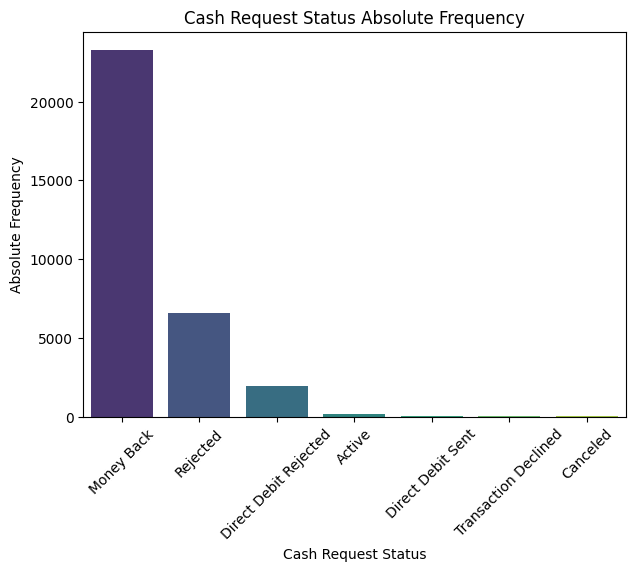

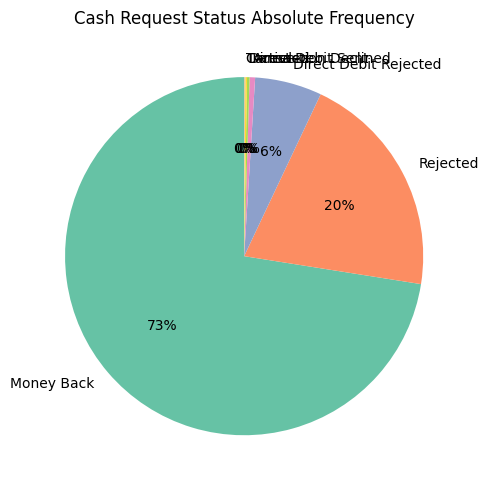


transfer_type
         absolute_frequency  relative_frequency
instant               19488               0.607
regular               12606               0.393
Total                 32094               1.000


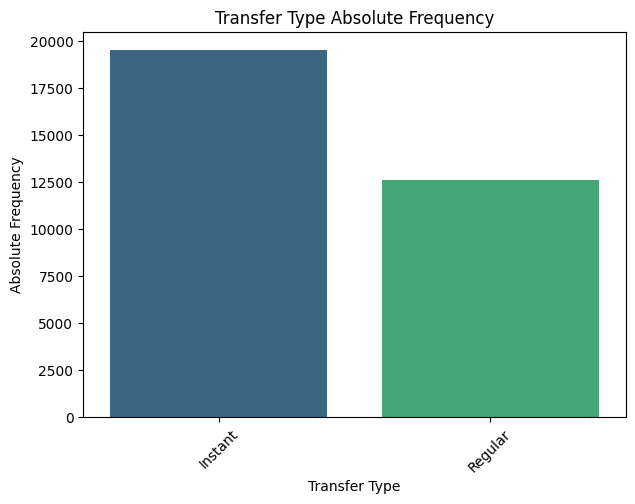

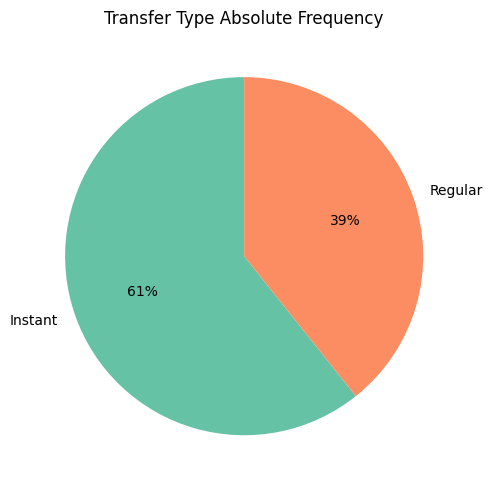


recovery_status
                      absolute_frequency  relative_frequency
completed                           5167               0.718
pending                             1996               0.277
pending_direct_debit                  36               0.005
cancelled                              1               0.000
Total                               7200               1.000


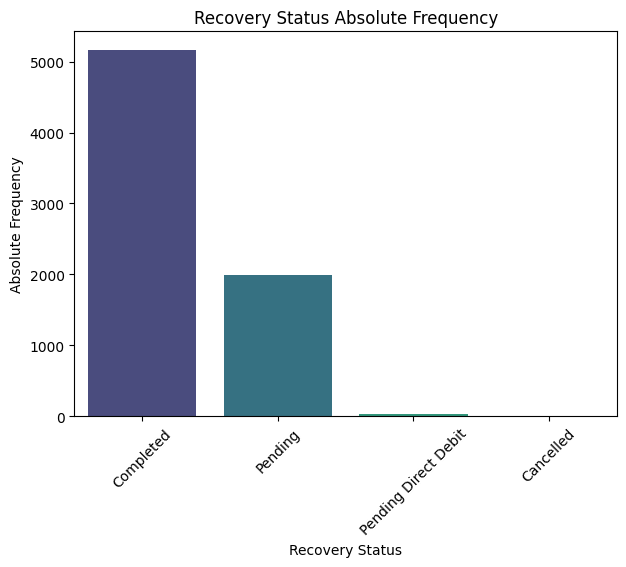

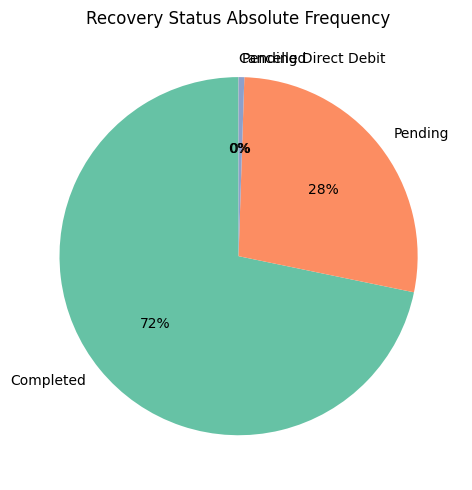


type
                 absolute_frequency  relative_frequency
instant_payment               11095               0.527
postpone                       7766               0.369
incident                       2196               0.104
Total                         21057               1.000


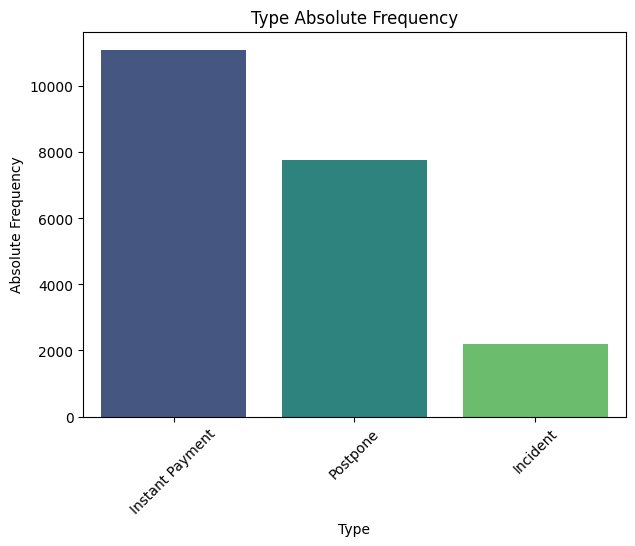

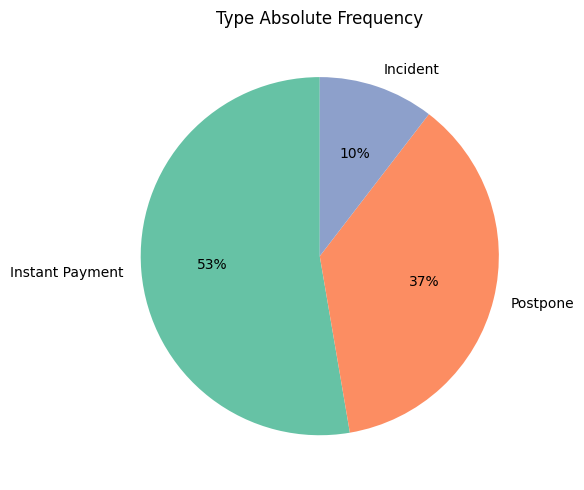


fee_status
           absolute_frequency  relative_frequency
accepted                14841               0.705
cancelled                4934               0.234
rejected                 1194               0.057
confirmed                  88               0.004
Total                   21057               1.000


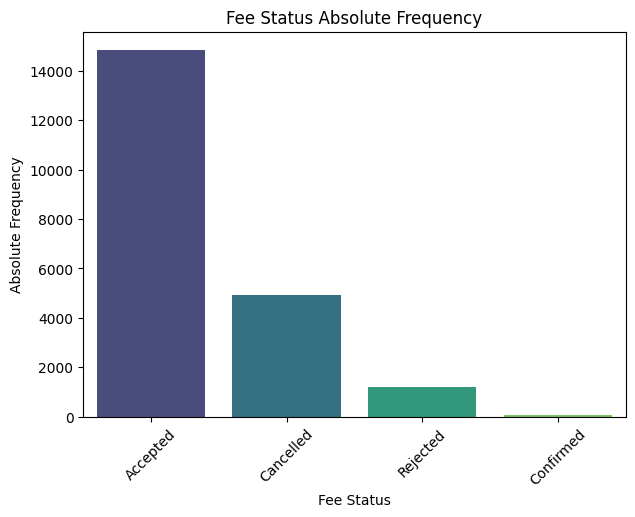

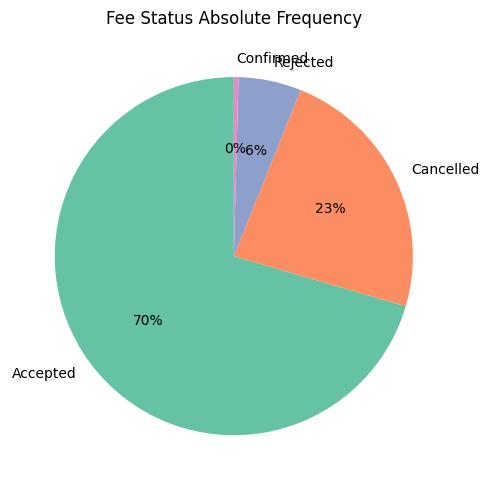


reason
                              absolute_frequency  relative_frequency
Instant Payment Cash Request               11095               0.527
Postpone Cash Request                       7766               0.369
rejected direct debit                       1599               0.076
month delay on payment                       597               0.028
Total                                      21057               1.000


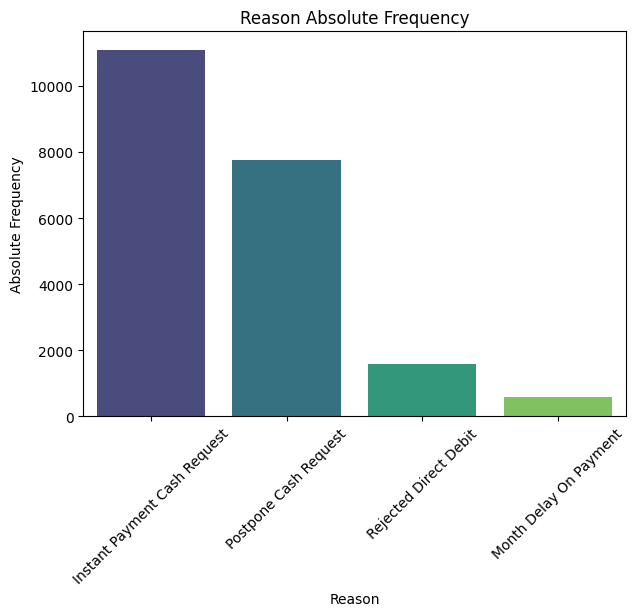

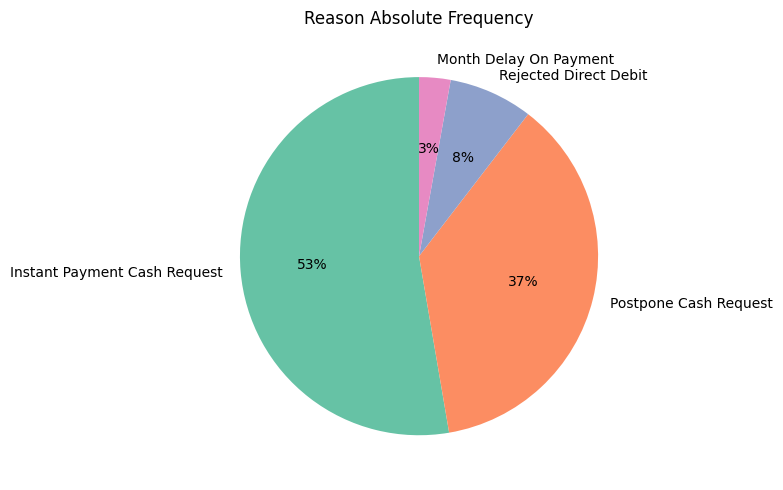


charge_moment
        absolute_frequency  relative_frequency
after                16720               0.794
before                4337               0.206
Total                21057               1.000


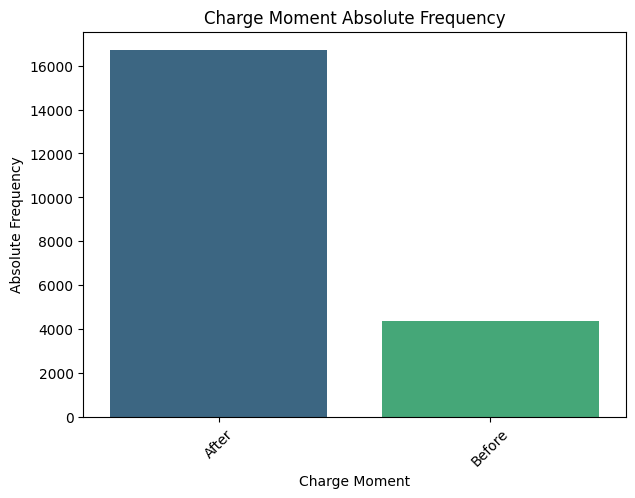

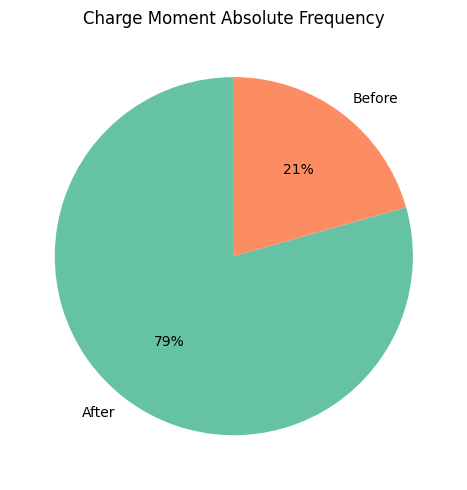


total_amount
       absolute_frequency  relative_frequency
5.0                 21056                 1.0
10.0                    1                 0.0
Total               21057                 1.0


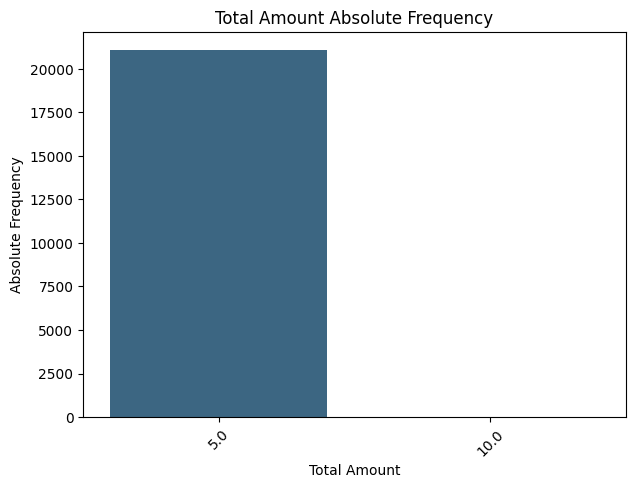

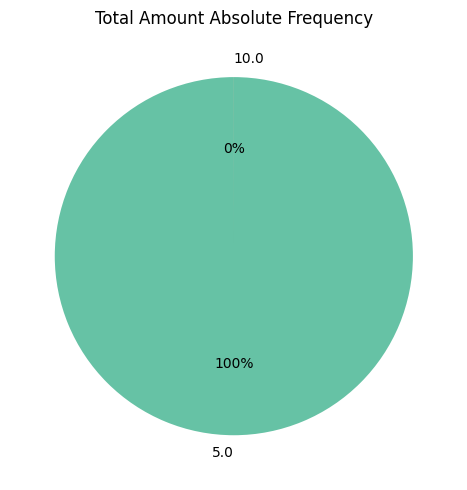

In [172]:
# Generate frequency table and bar plots for category columns
for column in cat.columns:
    print(column)
    df0, df1 = eda.freq(cat, column)
    print(df0)
    eda.cat_viz(cat, df1, column)
    print("")

amount
count    32094.000000
mean        83.516514
std         25.900244
min          1.000000
25%         50.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: amount, dtype: float64


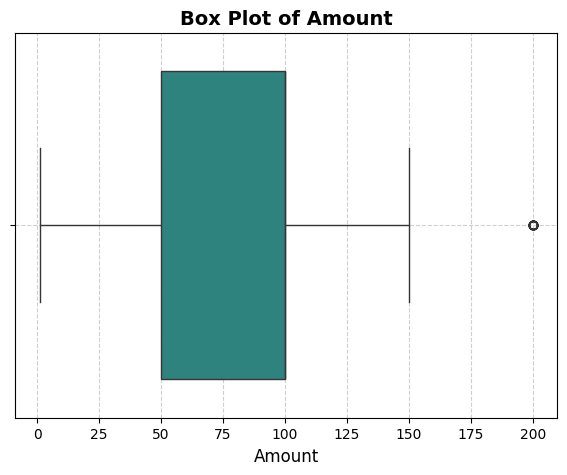

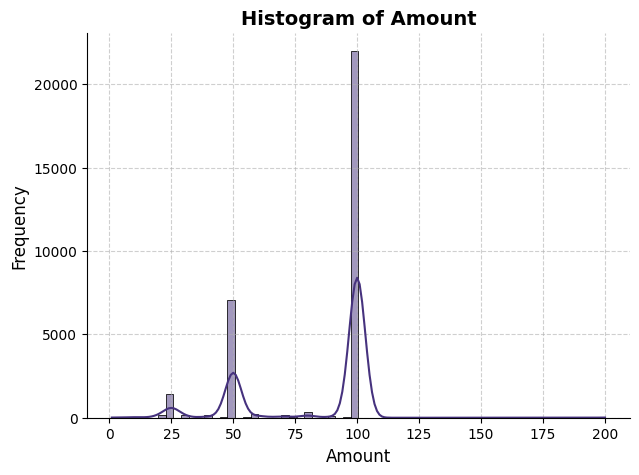


days_difference_CR_back
count    23917.000000
mean        40.175273
std         31.408267
min          0.000000
25%         20.000000
50%         29.000000
75%         52.000000
max        375.000000
Name: days_difference_CR_back, dtype: float64


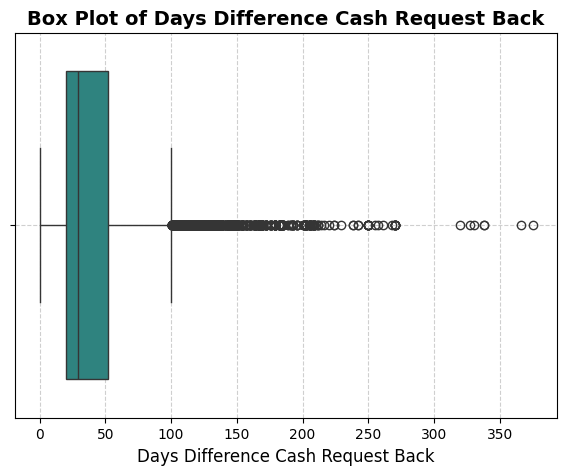

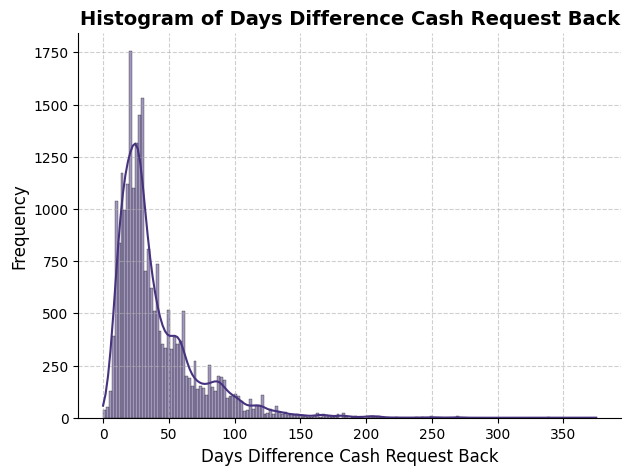


days_difference_fee_paid
count    15438.000000
mean        26.140692
std         25.963883
min          0.000000
25%          9.000000
50%         21.000000
75%         34.000000
max        183.000000
Name: days_difference_fee_paid, dtype: float64


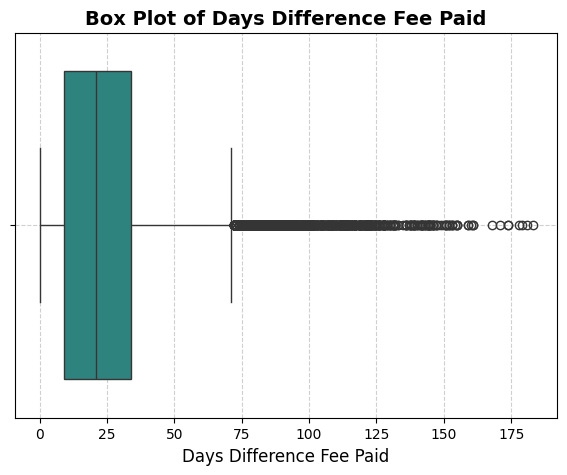

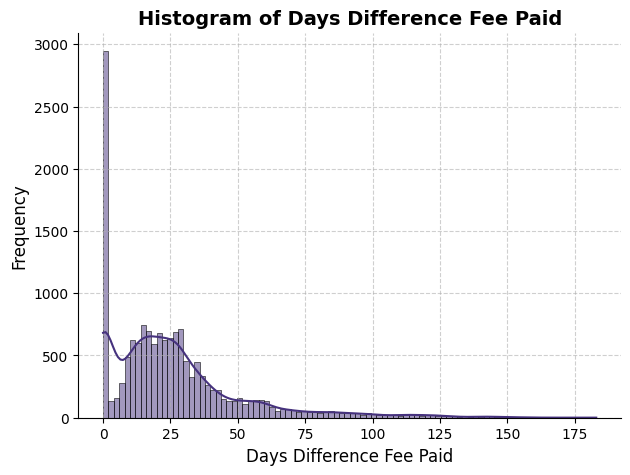

In [177]:
# EDA for numerical columns
for column in num.columns:
    print(column)
    print(eda.stat(num, column))
    eda.stat_viz(num,column)
    print("")

In [20]:
# We can divide the columns between us and ecah work in a set of columns performing an 
# univariate analysis (frequency plots, box plots, doughnut, histograms   or any other you concider)
#For numercial plots also create report in mean , meadian, std, and arrive to conclusions 